In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
import warnings
warnings.filterwarnings('ignore')

In [15]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
y_train.shape

(50000, 1)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

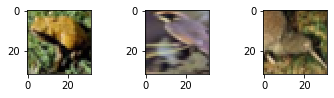

In [19]:
plt.subplot(331)
random = np.random.randint(0,len(X_train))
plt.imshow(X_train[random],cmap=plt.get_cmap('gray'))

plt.subplot(332)
random = np.random.randint(0,len(X_train))
plt.imshow(X_train[random],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random = np.random.randint(0,len(X_train))
plt.imshow(X_train[random],cmap=plt.get_cmap('gray'))

In [20]:
input_shape = (32,32,3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [21]:
X_train = X_train/255
X_test = X_test/255

In [22]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [24]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',
                input_shape=input_shape,
                activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',
              
                activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [27]:
opt = tf.keras.optimizers.RMSprop(lr=0.001)

In [28]:
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)         

In [29]:
batch_size = 32
epochs = 10

model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 169s 3ms/sample - loss: 1.4992 - accuracy: 0.4589 - val_loss: 1.3043 - val_accuracy: 0.5502
Epoch 2/10
50000/50000 [==============================] - 173s 3ms/sample - loss: 1.1031 - accuracy: 0.6130 - val_loss: 1.0011 - val_accuracy: 0.6510
Epoch 3/10
50000/50000 [==============================] - 173s 3ms/sample - loss: 0.9869 - accuracy: 0.6604 - val_loss: 0.8744 - val_accuracy: 0.6923
Epoch 4/10
50000/50000 [==============================] - 173s 3ms/sample - loss: 0.9209 - accuracy: 0.6834 - val_loss: 0.9277 - val_accuracy: 0.6804
Epoch 5/10
50000/50000 [==============================] - 173s 3ms/sample - loss: 0.9002 - accuracy: 0.6964 - val_loss: 0.8681 - val_accuracy: 0.6964
Epoch 6/10
50000/50000 [==============================] - 173s 3ms/sample - loss: 0.8813 - accuracy: 0.700